## Observations and Insights 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
#import os
#print(os.listdir('../Pymaceuticals/data'))
# Study data files
mouse_metadata_path = "../Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_df = mouse_metadata.merge(study_results, on='Mouse ID')
pymaceuticals_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [43]:
# Checking the number of mice in the DataFrame.

mouse_count = pymaceuticals_df['Mouse ID'].nunique()

In [44]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pymaceuticals_df['Mouse ID'].value_counts()


g989    13
o331    10
c832    10
g316    10
j755    10
        ..
o848     1
x336     1
v199     1
t573     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_isolation = pymaceuticals_df.set_index('Mouse ID')
dup_mouse = dup_isolation.loc['g989', :]
dup_mouse.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_df_clean = dup_isolation.drop(index = 'g989')

In [47]:
# Checking the number of mice in the clean DataFrame.
pymaceuticals_df_clean = pymaceuticals_df_clean.reset_index()
total_mouse_count = pymaceuticals_df_clean['Mouse ID'].nunique()
total_mouse_count

248

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pymaceuticals_drug_df = pymaceuticals_df_clean.groupby(['Drug Regimen'])
tumor_vol_mean = pd.DataFrame(pymaceuticals_drug_df['Tumor Volume (mm3)'].mean())
tumor_vol_median = pd.DataFrame(pymaceuticals_drug_df['Tumor Volume (mm3)'].median())
tumor_vol_var = pd.DataFrame(pymaceuticals_drug_df['Tumor Volume (mm3)'].var())
#tumor_vol_stdev = st.tstd([pymaceuticals_drug_df['Tumor Volume (mm3)']])
tumor_vol_sem = pd.DataFrame(pymaceuticals_drug_df['Tumor Volume (mm3)'].sem())


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_dfs =[tumor_vol_mean, tumor_vol_median, tumor_vol_var, tumor_vol_sem]
tumor_vol_sum_df = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), summary_dfs)
tumor_vol_sum_df = tumor_vol_sum_df.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Vol. Mean', 'Tumor Volume (mm3)_y': 'Tumor Vol. Median', 'Tumor Volume (mm3)_x':'Tumor Vol. Var.', 'Tumor Volume (mm3)_y': 'Tumor Vol. StDev'})
tumor_vol_sum_df

,Tumor Vol. Var.,Tumor Vol. StDev,Tumor Vol. Var.,Tumor Vol. StDev
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


## Bar Plots

In [50]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
drug_df = pd.DataFrame(pymaceuticals_df_clean['Drug Regimen'], )
drug_df
#multi_plot = pymaceuticals_df_clean.plot(x= 'Timepoint', y= 'Drug Regimen', kind="bar", figsize=(20,5)) 
#plt.show()
#plt.tight_layout()

,Drug Regimen
0,Ramicane
1,Ramicane
2,Ramicane
3,Ramicane
4,Ramicane
...,...
1875,Naftisol
1876,Naftisol
1877,Naftisol
1878,Naftisol


In [51]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

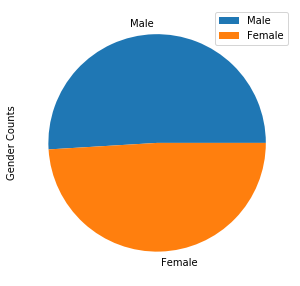

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = pymaceuticals_df_clean['Sex'].value_counts()
mouse_gender_df = pd.DataFrame({'Gender Counts': [(mouse_gender[0]),(mouse_gender[1])]},
                               index=['Male', 'Female'])
gender_plot = mouse_gender_df.plot.pie(y='Gender Counts', figsize=(5, 5))


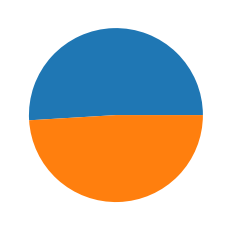

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender)
plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
top_treatment_df = pymaceuticals_df_clean.loc[(pymaceuticals_df_clean["Drug Regimen"] == "Capomulin") | (pymaceuticals_df_clean["Drug Regimen"] == "Ramicane") | (pymaceuticals_df_clean["Drug Regimen"] == "Ceftamin") | (pymaceuticals_df_clean["Drug Regimen"] == "Infubinol"), :]
top_treatment_sorted = top_treatment_df.sort_values('Timepoint', ascending = False)
top_treatment_last = top_treatment_sorted.drop_duplicates(subset='Mouse ID', keep='first')
# Determine quartiles
quartiles = top_treatment_last['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

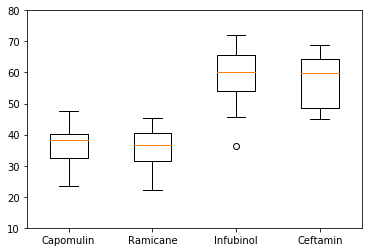

In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
final_df = top_treatment_last.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

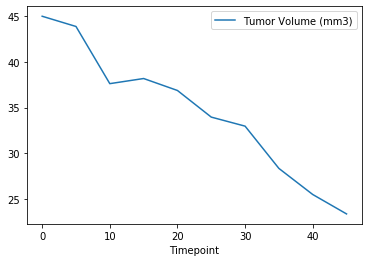

In [76]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = pymaceuticals_df_clean.loc[(pymaceuticals_df_clean['Drug Regimen'] == 'Capomulin')]
capo_mouse_zero = capomulin_df['Mouse ID'].unique()
capo_mouse_zero_df = pymaceuticals_df_clean.loc[(pymaceuticals_df_clean['Mouse ID'] == capo_mouse_zero[0])]
capo_mouse_clean = capo_mouse_zero_df[['Timepoint', 'Tumor Volume (mm3)']]
capo_mouse_clean.plot.line('Timepoint', 'Tumor Volume (mm3)' )

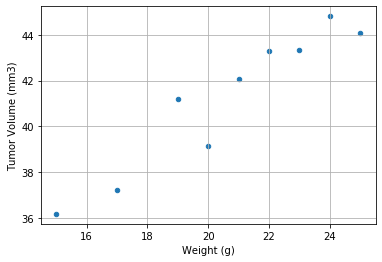

In [84]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_avg_vol = pd.DataFrame(capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean())
capo_avg_vol = capo_avg_vol.reset_index()
capo_avg_vol.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', grid=True)

## Correlation and Regression

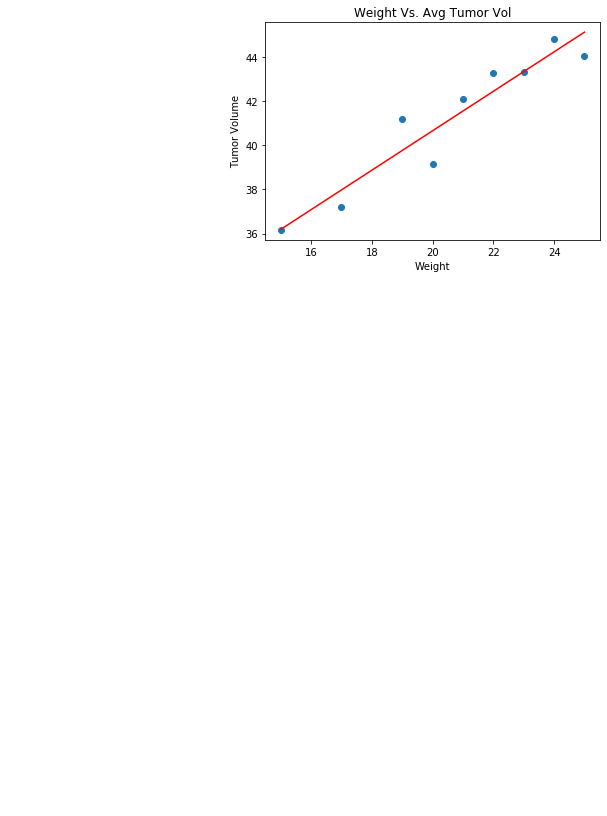

In [88]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_avg_vol['Weight (g)']
y_values = capo_avg_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()